In [1]:
import zipfile
import os
import pandas as pd

In [2]:
def concatenar_csvs(diretorio):
    frames = []

    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.csv'):
            caminho_arquivo = os.path.join(diretorio, arquivo)
            
            df = pd.read_csv(caminho_arquivo, encoding='utf-8', delimiter=";", decimal=",")
            df = df.rename(columns={df.columns[0]: "data_base"})
            df['data_base'] = pd.to_datetime(df['data_base'], format="%Y-%m-%d")
            df = df[['data_base', 'uf','carteira_ativa']] 
            df = df.groupby(['data_base','uf'])['carteira_ativa'].sum().reset_index()
            
            frames.append(df)

    df_concatenado = pd.concat(frames, ignore_index=True)

    return df_concatenado

In [3]:
anos = list(range(2012, 2024))
dataframes = []

for ano in anos:
    diretorio = f"planilha_{ano}"
    dataframe_ano = concatenar_csvs(diretorio)
    dataframes.append(dataframe_ano)

df_total = pd.concat(dataframes, ignore_index=False)

In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3645 entries, 0 to 215
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_base       3645 non-null   datetime64[ns]
 1   uf              3645 non-null   object        
 2   carteira_ativa  3645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 113.9+ KB


In [7]:
df_total['ano'] = df_total['data_base'].dt.year
df_total.head(3)

,data_base,uf,carteira_ativa,ano
0,2012-06-30,AC,4.243827e+09,2012
1,2012-06-30,AL,1.406038e+10,2012
2,2012-06-30,AM,1.980345e+10,2012


In [8]:
df_total['mes'] = df_total['data_base'].dt.month
df_total.head(3)

,data_base,uf,carteira_ativa,ano,mes
0,2012-06-30,AC,4.243827e+09,2012,6
1,2012-06-30,AL,1.406038e+10,2012,6
2,2012-06-30,AM,1.980345e+10,2012,6


In [11]:
df_divida_uf = df_total.groupby(['uf', 'ano'])['carteira_ativa'].sum().reset_index()

In [12]:
df_divida_uf.head(3)

,uf,ano,carteira_ativa
0,AC,2012,3.216106e+10
1,AC,2013,6.587592e+10
2,AC,2014,7.355856e+10


In [13]:
df_divida_uf.to_csv("analise_divida_uf.csv")

In [36]:
df_divida_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uf              324 non-null    object 
 1   ano             324 non-null    int32  
 2   carteira_ativa  324 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 6.5+ KB


In [37]:
df_divida_uf['ano'] = df_divida_uf['ano'].astype('object')

In [17]:
import plotly.express as px

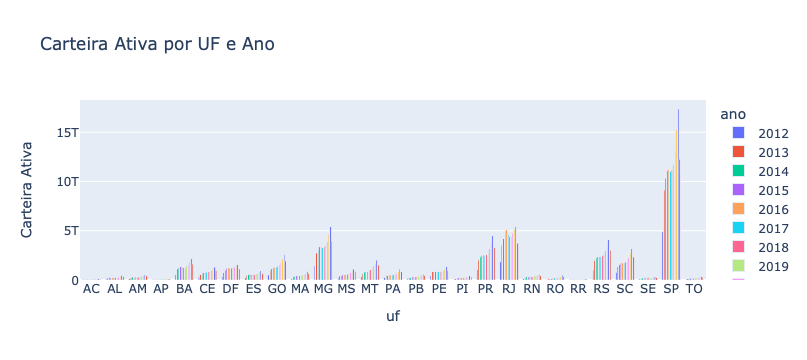

In [38]:
fig = px.bar(df_divida_uf, 
             x='uf', 
             y='carteira_ativa',
             title='Carteira Ativa por UF e Ano',
             labels={'carteira_ativa':'Carteira Ativa', 'uf_ano':'UF e Ano'},
             color='ano',
            barmode = 'group')  # Colorindo as barras por UF

fig.show()